# **Data management and analysis.** Cayetano Soneira Landín

## Download the following file: núcleos de Poblacion, read it using pandas and solve the following tasks:

- How many "Municipios" have a population larger than 100000?. Which is the second most populated city? In which position is Granada in the ranking of the most populated cities?

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# Read the file "nucleos_de_Poblacion.csv" using pandas
df = pd.read_csv("populations.csv")

# How many "Municipios" have a population larger than 100000?
pop_gt_100k = df[df["Poblacion"] > 100000].shape[0]
print(f"There are {pop_gt_100k} municipios with a population larger than 100000.")

# Which is the second most populated city?
second_most_pop = df.sort_values(by="Poblacion", ascending=False)["Municipio"].iloc[1]
print(f"The second most populated city is {second_most_pop}.")

# In which position is Granada in the ranking of the most populated cities?
granada_rank = df[df["Municipio"] == "Granada"].index[0] + 1
print(f"Granada is ranked #{granada_rank} in the list of most populated cities.")

There are 62 municipios with a population larger than 100000.
The second most populated city is Barcelona.
Granada is ranked #273 in the list of most populated cities.


- Which are the 10 less populated "municipios"?

In [2]:
# Which are the 10 less populated "municipios"?
least_pop = df.sort_values(by="Poblacion")["Municipio"].head(10)
print(f"The 10 least populated municipios are: {least_pop.tolist()}")

The 10 least populated municipios are: ['Zumarraga', 'Caldas de Reis', 'Amurrio', 'Premià de Dalt', 'Buñol', 'Bembibre', 'Ocaña', 'Sax', 'San Fulgencio', 'San Bartolomé']


- ¿How many "municipios" in Leon have a population smaller than 60000?

In [3]:
# ¿How many "municipios" in Leon have a population smaller than 60000?
leon_lt_60k = df[(df["Provincia"] == "León") & (df["Poblacion"] < 60000)].shape[0]
print(f"There are {leon_lt_60k} municipios in León with a population smaller than 60000.")

There are 7 municipios in León with a population smaller than 60000.


- Which is the most northen "municipio"? (Note that the "Y" coordinate represents the latitude in degrees). Specify as well in which "Provincia" it is in and the number of inhabitants there are.

In [4]:
# Which is the most northen "municipio"? (Note that the "Y" coordinate represents the latitude in degrees). 
# Specify as well in which "Provincia" it is in and the number of inhabitants there are.
most_north = df.sort_values(by="Y", ascending=False).iloc[0]
most_north_municipio = most_north["Municipio"]
most_north_Provincia = most_north["Provincia"]
most_north_pop = most_north["Poblacion"]
print(f"The most northen municipio is {most_north_municipio} in {most_north_Provincia} with a population of {most_north_pop}.")

The most northen municipio is Viveiro in Lugo with a population of 16211.0.


- Which is the most eastern "municipio" in Cantabria? And the most western?

In [5]:
# Which is the most eastern "municipio" in Cantabria? And the most western?

cantabria_df = df[df["Provincia"] == "Cantabria"]
eastern = cantabria_df.loc[cantabria_df["X"].idxmax()]
western = cantabria_df.loc[cantabria_df["X"].idxmin()]
print("The most eastern municipio in Cantabria is", eastern["Texto"], "and the most western is", western["Texto"])

The most eastern municipio in Cantabria is Castro-Urdiales and the most western is Reinosa


- Specify the names of the closest and furthest "munipios" to Madrid (different from Madrid). Calculate the distance to solve this tasks.

In [6]:
# Specify the names of the closest and furthest "munipios" to Madrid (different from Madrid). Calculate the distance to solve this tasks.
madrid = (40.4165, -3.70256)  # latitude and longitude of Madrid
min_distance = float("inf")
max_distance = 0
closest_municipio = None
furthest_municipio = None
for i, row in df.iterrows():
    municipio = (row["Y"], row["X"])  # latitude and longitude of the municipio
    distance = geodesic(madrid, municipio).km
    if distance < min_distance and row["Texto"] != "Madrid":
        min_distance = distance
        closest_municipio = row["Texto"]
    if distance > max_distance:
        max_distance = distance
        furthest_municipio = row["Texto"]
print("The closest municipio to Madrid is", closest_municipio, "at a distance of", min_distance, "km")
print("The furthest municipio to Madrid is", furthest_municipio, "at a distance of", max_distance, "km")

The closest municipio to Madrid is Humera-Somosaguas-prado del Rey at a distance of 7.03203148895158 km
The furthest municipio to Madrid is Los Llanos de Aridane at a distance of 1840.1151310901598 km


- How many "Municipios" are within a 5 degree radius from Barcelona city?

In [7]:
# How many "Municipios" are within a 5 degree radius from Barcelona city?
barcelona = (41.3851, 2.1734)  # latitude and longitude of Barcelona
radius = 5  # radius in degrees
num_municipios = 0
for i, row in df.iterrows():
    municipio = (row["Y"], row["X"])  # latitude and longitude of the municipio
    distance = geodesic(barcelona, municipio).km
    if distance <= radius:
        num_municipios += 1
print("There are", num_municipios, "municipios within a 5 degree radius of Barcelona")

There are 1 municipios within a 5 degree radius of Barcelona


- Calculate the mean, median, standard deviation, maximun and minimum values of the population of Cantabria's "municipios".

In [8]:
cantabria_df = df[df["Provincia"] == "Cantabria"]

mean_pop = cantabria_df["Poblacion"].mean()
median_pop = cantabria_df["Poblacion"].median()
std_pop = cantabria_df["Poblacion"].std()
max_pop = cantabria_df["Poblacion"].max()
min_pop = cantabria_df["Poblacion"].min()

print(f"Mean population: {mean_pop}")
print(f"Median population: {median_pop}")
print(f"Standard deviation of population: {std_pop}")
print(f"Maximum population: {max_pop}")
print(f"Minimum population: {min_pop}")

Mean population: 31246.285714285714
Median population: 14322.0
Standard deviation of population: 45088.68483748031
Maximum population: 181589.0
Minimum population: 10277.0


- Calculate the population in each "Provincia".

In [9]:
pop_by_province = df.groupby("Provincia")["Poblacion"].sum()
print(pop_by_province)

Provincia
A Coruña                   818982.0
Alacant/Alicante          1804252.0
Albacete                   280673.0
Almería                    550604.0
Asturias                   965777.0
Badajoz                    361700.0
Barcelona                 4934795.0
Burgos                     250766.0
Cantabria                  437448.0
Castelló/Castellón         476388.0
Ceuta                       80579.0
Ciudad Real                348364.0
Cuenca                      71921.0
Cáceres                    176220.0
Cádiz                     1166531.0
Córdoba                    590503.0
Girona                     474739.0
Granada                    604357.0
Guadalajara                139373.0
Guipúzcoa                  546141.0
Huelva                     361777.0
Huesca                     124838.0
Illes Balears             1041183.0
Jaén                       426169.0
La Rioja                   203911.0
Las Palmas                1220407.0
León                       316662.0
Lleida            

## The files precip.csv y precip.stn contain data regarding daily rainfall between  2000-2010 in 86 different meteorological stations along Europe. Read both files and analyze the data using pandas:
- Get and export in csv the data associated to the monthly, stational and yearly series.

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Read the data from the precip.csv file
precip_df = pd.read_csv('precip.csv', header=0, index_col=0)
precip_df.index = pd.to_datetime(precip_df.index)

# Read the data from the precip.stn file
stations_df = pd.read_csv('precip.stn', header=0, index_col=0)

# Create the groups
monthly_df = precip_df.groupby(precip_df.index.month).sum()
yearly_df = precip_df.groupby(precip_df.index.year).sum()
stational_df = stations_df.sum(axis = 1)

# Export the data to CSV files
monthly_df.to_csv('monthly_precip.csv')
stational_df.to_csv('stational_precip.csv')
yearly_df.to_csv('yearly_precip.csv')

- Plot the time series associated to the average spatial value of the monthly, stational and yearly data.

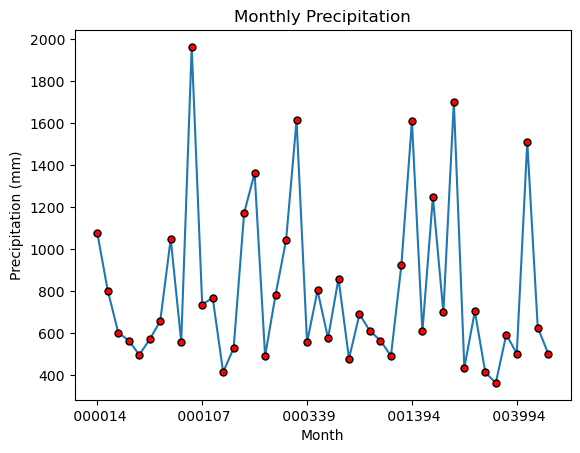

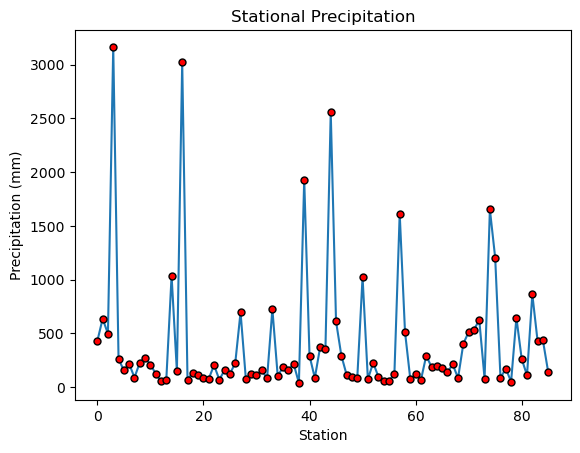

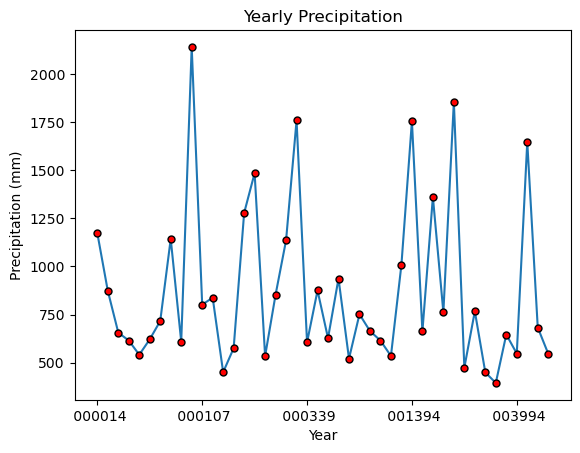

In [12]:
import matplotlib.pyplot as plt

monthly_df = monthly_df.mean()
yearly_df = yearly_df.mean()

# Plot the monthly data
monthly_df.plot(marker='.', markersize=10, markerfacecolor='r', markeredgecolor='k')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Monthly Precipitation')
plt.show()

# Plot the stational data
plt.plot(stational_df.values,marker='.', markersize=10, markerfacecolor='r', markeredgecolor='k')
plt.xlabel('Station')
plt.ylabel('Precipitation (mm)')
plt.title('Stational Precipitation')
plt.show()

# Plot the yearly data
yearly_df.plot(marker='.', markersize=10, markerfacecolor='r', markeredgecolor='k')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Yearly Precipitation')
plt.show()

- Calculate the frequency of days with rainfall larger than 1 mm

In [13]:
precip_df = pd.read_csv('precip.csv', header=0, index_col=0)
precip_df.index = pd.to_datetime(precip_df.index)

df = precip_df.dropna(axis=1)

# Try to convert the elements to numeric format
df = df.apply(pd.to_numeric, errors='coerce')

# Create a boolean mask of elements that are numeric and > 1
condition = ((df > 1) & df.notna())

# Count the number of elements that satisfy the conditions
count = condition.sum().sum()
print(count)

100257
